In [27]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

In [28]:
# Load the data
data = pd.read_csv('micro_world.csv', engine='python')

In [29]:
# Filter Philippine data
philippine_data = data[
    data['economy'] == 'Philippines'
]

In [32]:
#Filter mobile/internet access (FI access)
data['has_digital access'] = np.where(data[['fin14a', 'fin14b', 'fin5']].eq(1).any(axis = 1 ), 1, 0)

digital_grouped_data = data.groupby(['economy','regionwb']).agg(
 with_digitalaccess=('has_digital access', 'sum'),
 total_population=('wpid_random', 'count'))

digital_grouped_data['percent of banked with digital access'] = digital_grouped_data['with_digitalaccess'] * 100.0 / digital_grouped_data['total_population']
digital_grouped_data = digital_grouped_data.reset_index()  

SEA_data = digital_grouped_data[digital_grouped_data['regionwb']=='East Asia & Pacific (excluding high income)']
SEA_data = SEA_data.sort_values('percent of banked with digital access', ascending=[False])
SEA_data

,economy,regionwb,with_digitalaccess,total_population,percent of banked with digital access
80,Malaysia,East Asia & Pacific (excluding high income),465,1004,46.314741
87,Mongolia,East Asia & Pacific (excluding high income),394,1000,39.400000
25,China,East Asia & Pacific (excluding high income),1286,3627,35.456300
139,Vietnam,East Asia & Pacific (excluding high income),225,1002,22.455090
125,Thailand,East Asia & Pacific (excluding high income),182,1000,18.200000
55,Indonesia,East Asia & Pacific (excluding high income),138,1000,13.800000
104,Philippines,East Asia & Pacific (excluding high income),97,1000,9.700000
69,Lao PDR,East Asia & Pacific (excluding high income),71,1000,7.100000
19,Cambodia,East Asia & Pacific (excluding high income),58,1600,3.625000
91,Myanmar,East Asia & Pacific (excluding high income),52,1600,3.250000


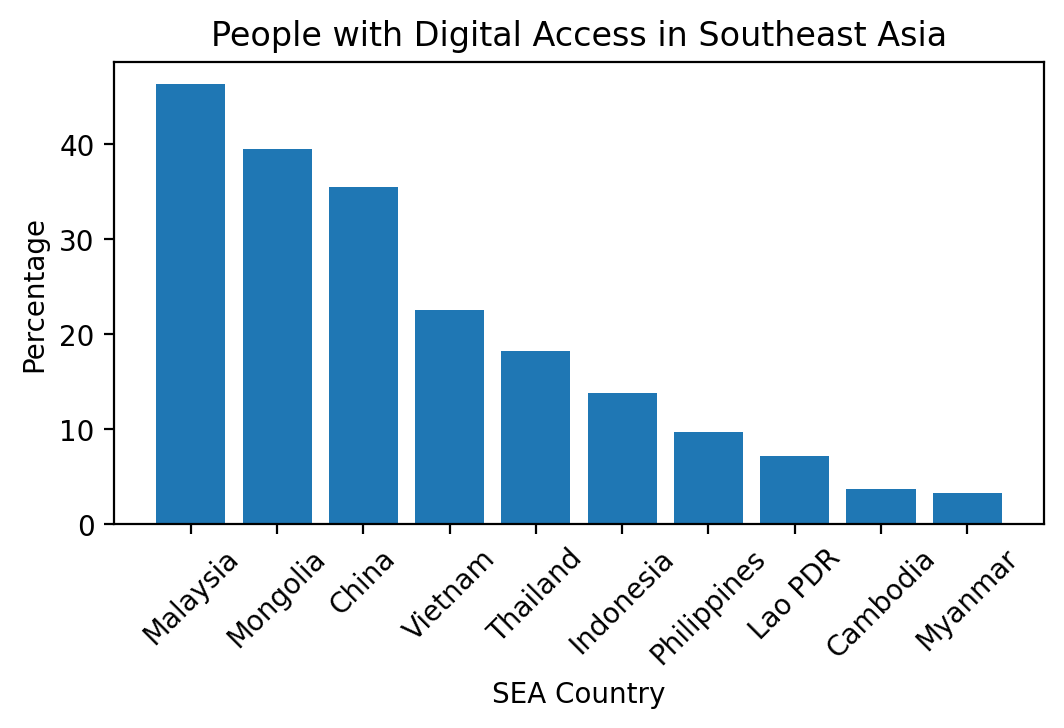

In [6]:
plt.figure(figsize=(6,3)  , dpi=200)
plt.bar(
    SEA_data['economy'],
    SEA_data['percent of banked with digital access']
)
plt.title("People with Digital Access in Southeast Asia")

# Set labels
plt.xlabel('SEA Country')
plt.ylabel('Percentage')

plt.xticks(rotation=45)
plt.show()


In [21]:
PH_data = data[data['economy']=='Philippines']
PH_data

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy,has_digital access
114292,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,180129353,0.261434,2,66.0,1.0,1,...,2,2,4.0,2,3.0,0.0,NaN,0.0,NaN,0
114293,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,171987745,0.424916,2,24.0,3.0,5,...,4,4,4.0,4,1.0,0.0,0.0,1.0,1.0,1
114294,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,178228576,0.732469,2,88.0,1.0,4,...,2,2,4.0,2,5.0,0.0,NaN,0.0,NaN,0
114295,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,193725076,0.388121,2,30.0,2.0,5,...,4,4,4.0,2,5.0,0.0,NaN,0.0,NaN,0
114296,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,194711242,2.333196,2,33.0,3.0,5,...,1,4,2.0,2,1.0,0.0,NaN,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115287,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,151988960,1.249522,1,27.0,2.0,1,...,4,4,2.0,2,5.0,0.0,NaN,0.0,NaN,0
115288,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,138300933,0.697020,1,68.0,1.0,1,...,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN,0
115289,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,134514859,2.614345,2,18.0,2.0,4,...,4,4,4.0,4,2.0,0.0,0.0,1.0,1.0,1
115290,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,145841428,1.916246,1,20.0,2.0,4,...,4,4,4.0,2,2.0,0.0,NaN,0.0,NaN,0


In [36]:
digital_access = {
    1: 'Yes',
    0: 'No'
}

In [37]:
PH_data = PH_data.replace(
{ 'has_digital access': digital_access
})

In [38]:
PH_data 

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy,has_digital access,has_mobilephone
114292,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,180129353,0.261434,2,66.0,1.0,1,...,2,4.0,2,3.0,0.0,NaN,0.0,NaN,No,No
114293,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,171987745,0.424916,2,24.0,3.0,5,...,4,4.0,4,1.0,0.0,0.0,1.0,1.0,Yes,Yes
114294,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,178228576,0.732469,2,88.0,1.0,4,...,2,4.0,2,5.0,0.0,NaN,0.0,NaN,No,No
114295,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,193725076,0.388121,2,30.0,2.0,5,...,4,4.0,2,5.0,0.0,NaN,0.0,NaN,No,Yes
114296,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,194711242,2.333196,2,33.0,3.0,5,...,4,2.0,2,1.0,0.0,NaN,0.0,NaN,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115287,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,151988960,1.249522,1,27.0,2.0,1,...,4,2.0,2,5.0,0.0,NaN,0.0,NaN,No,Yes
115288,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,138300933,0.697020,1,68.0,1.0,1,...,4,4.0,4,5.0,0.0,NaN,0.0,NaN,No,No
115289,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,134514859,2.614345,2,18.0,2.0,4,...,4,4.0,4,2.0,0.0,0.0,1.0,1.0,Yes,Yes
115290,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,145841428,1.916246,1,20.0,2.0,4,...,4,4.0,2,2.0,0.0,NaN,0.0,NaN,No,Yes


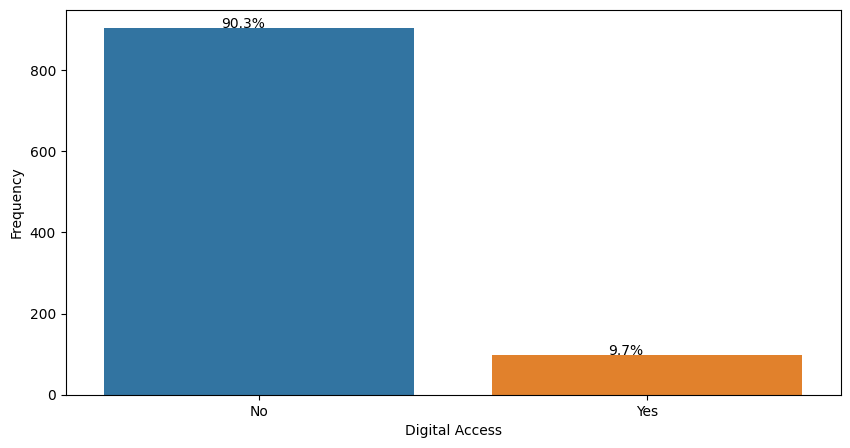

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='has_digital access', data=PH_data)
# Annotate percentage
total = len(PH_data['has_digital access'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y))
    
# Set labels
plt.xlabel('Digital Access')
plt.ylabel('Frequency')

plt.show()

In [23]:
#Filter mobile/internet access (FI access)
PH_data['has_mobilephone'] = np.where(PH_data[['mobileowner']].eq(1).any(axis = 1 ), 1, 0)

C:\Users\colee\AppData\Local\Temp\ipykernel_23164\413962202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH_data['has_mobilephone'] = np.where(PH_data[['mobileowner']].eq(1).any(axis = 1 ), 1, 0)


In [24]:
mobile_group_map = {
    1: 'Yes',
    0: 'No'
}

In [25]:
PH_data = PH_data.replace(
{ 'has_mobilephone': mobile_group_map
})

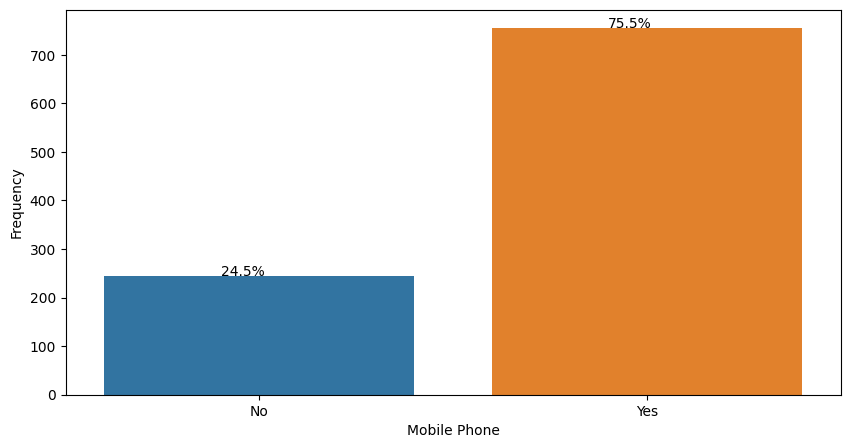

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='has_mobilephone', data=PH_data)
# Annotate percentage
total = len(PH_data['has_mobilephone'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y))
    
# Set labels
plt.xlabel('Mobile Phone')
plt.ylabel('Frequency')

plt.show()